In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/3f/llq03h9s01b8gp_qjrrnx_l40000gn/T/ipykernel_43106/3726615664.py:36: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.8}` instead.

  sns.pointplot(
/var/folders/3f/llq03h9s01b8gp_qjrrnx_l40000gn/T/ipykernel_43106/3726615664.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


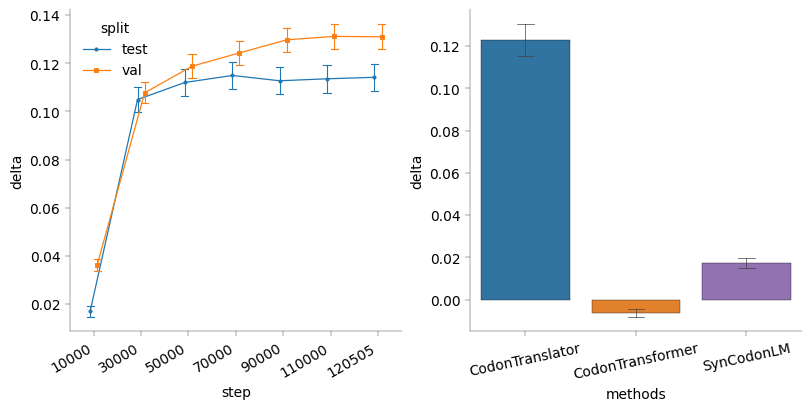

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- load data ----
df_steps   = pd.read_csv("./merged/delta_points_checkpoints.csv")
df_methods = pd.read_csv("./merged/delta_points_methods.csv")

# ---- palettes (matches prior method colors) ----
_base = sns.color_palette()
METHOD_ORDER = ["CodonTranslator", "CodonTransformer", "SynCodonLM"]
METHOD_PALETTE = {
    "CodonTranslator": _base[0],
    "CodonTransformer": _base[1],
    "SynCodonLM": _base[4],
}
SPLIT_PALETTE = {"val": _base[1], "test": _base[0]}  # 2 distinct colors

# ---- tiny helper for axes styling ----
def style_axes(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for side in ("bottom", "left"):
        ax.spines[side].set_linewidth(0.25)
        ax.spines[side].set_color("black")
    ax.tick_params(width=0.25, colors="black")

# ---- build figure ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

# ===== Left panel: checkpoints (pointplot) =====
# ensure sorted x order
x_order = sorted(df_steps["step"].unique())

sns.pointplot(
    data=df_steps,
    x="step", y="delta", hue="split",
    order=x_order,
    errorbar="se", errwidth=0.8, capsize=0.15,
    markers=["o", "s"], linestyles="-", linewidth=0.9,
    dodge=0.15, palette=SPLIT_PALETTE, ax=ax1,
)

ax1.set_xlabel("step")
ax1.set_ylabel("delta")
for t in ax1.get_xticklabels():
    t.set_rotation(30)
    t.set_ha("right")

# legend inside plot so it doesn't get clipped
ax1.legend(title="split", loc="upper left", frameon=False)
style_axes(ax1)

# ===== Right panel: methods (barplot) =====
sns.barplot(
    data=df_methods,
    x="methods", y="delta",
    order=METHOD_ORDER,
    estimator=np.mean, errorbar=("ci", 95), capsize=0.15,
    palette=[METHOD_PALETTE[m] for m in METHOD_ORDER],
    edgecolor="black", linewidth=0.25, ax=ax2,
    err_kws={"linewidth": 0.5},
)

ax2.set_xlabel("methods")
ax2.set_ylabel("delta")
ax2.tick_params(axis="x", rotation=12)
style_axes(ax2)

# ---- save ----
fig.savefig("delta_two_panel.eps", format="eps", bbox_inches="tight")
plt.show()


In [11]:
he_data = pd.read_csv('./merged/HE_data.csv')

In [12]:
he_data

,protein,protein sequence,organism,codontranslator_predicted_codon_seq,codontranslator_neg_cis_elements,syncodonlm_predicted_codon_seq,syncodonlm_neg_cis_elements,codontransformer_predicted_codon_seq,codontransformer_neg_cis_elements,twist_predicted_codon_seq,...,IDT_CSI,Genewiz_GC,Genewiz_ENC,Genewiz_CSI,vrna_mfe_nt_CodonTranslator,vrna_mfe_nt_SynCodonLM,vrna_mfe_nt_CodonTransformer,vrna_mfe_nt_Twist,vrna_mfe_nt_IDT,vrna_mfe_nt_Genewiz
0,Insulin,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,Escherichia coli,ATGGCGCTCTGGATGAGGCTGTTGCCTCTTCTGGCCCTGTTGGCTC...,1,ATGGCACTGTGGATGAGATTATTACCCCTGCTGGCATTGCTGGCAC...,1.0,ATGGCATTATGGATGCGTTTACTGCCGCTGCTGGCGCTGCTGGCGC...,1,ATGGCCTTGTGGATGCGCTTACTGCCACTGCTGGCCCTGCTGGCGC...,...,0.741229,0.609610,27.577721,0.887255,-0.333634,-0.377778,-0.445946,-0.357958,-0.298499,-0.427928
1,Somatotropin,MATGSRTSLLLAFGLLCLPWLQEGSAFPTIPLSRLFDNAMLRAHRL...,Escherichia coli,ATGGCAACAGGGAGCAGGACATCACTTCTGTTAGCATTTGGTCTGC...,0,ATGGCAACCGGTTCAAGAACCTCTTTGCTGCTGGCATTCGGCCTGC...,0.0,ATGGCAACAGGATCAAGAACCTCACTGCTGCTGGCCTTTGGCCTGC...,0,ATGGCAACCGGCTCTCGTACCTCGTTGCTCCTTGCCTTTGGTTTAC...,...,0.730031,0.538226,21.040162,0.951384,-0.231498,-0.330581,-0.349694,-0.292966,-0.307951,-0.347095
2,Erythropoietin,MGVHECPAWLWLLLSLLSLPLGLPVLGAPPRLICDSRVLERYLLEA...,Escherichia coli,ATGGGCGTACATGAATGCCCTGCCTGGCTGTGGCTGCTTTTATCAC...,0,ATGGGCGTACATGAATGCCCTGCCTGGCTGTGGCTGCTGCTCAGCC...,0.0,ATGGGTGTTCATGAATGTCCGGCATGGCTGTGGCTGCTGCTCTCGC...,0,ATGGGTGTCCACGAATGCCCTGCGTGGCTGTGGTTGCTGTTGAGTC...,...,0.763969,0.599656,24.728295,0.897616,-0.354467,-0.425258,-0.448969,-0.374055,-0.345533,-0.430069
3,Interferon alpha,MASPFALLMVLVVLSCKSSCSLGCDLPETHSLDNRRTLMLLAQMSR...,Escherichia coli,ATGGCATCCCCGTTTGCACTTCTCATGGTATTGGTGGTATTAAGCT...,0,ATGGCAAGCCCTTTTGCATTATTAATGGTGCTGGTAGTACTCAGCT...,0.0,ATGGCATCACCTTTTGCATTACTGATGGTGCTGGTGGTGCTGAGCT...,1,ATGGCATCGCCGTTTGCTCTGTTGATGGTTTTGGTCGTGTTATCGT...,...,0.744278,0.540351,20.878049,0.956528,-0.280000,-0.355965,-0.395088,-0.284561,-0.292281,-0.358947
4,Interferon omega-1,MALLFPLLAALVMTSYSPVGSLGCDLPQNHGLLSRNTLVLLHQMRR...,Escherichia coli,ATGGCACTGCTCTTCCCACTGCTGGCAGCTCTTGTGATGACCTCAT...,0,ATGGCACTGTTATTTCCGCTGTTAGCCGCGCTGGTAATGACCAGCT...,0.0,ATGGCATTATTATTTCCGCTGCTGGCCGCGCTGGTGATGACCAGCT...,1,ATGGCGCTGTTGTTCCCCCTGCTCGCAGCCCTGGTGATGACCTCAT...,...,0.718287,0.571429,20.834380,0.949295,-0.337415,-0.357993,-0.421258,-0.313605,-0.308333,-0.402721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Regulatory protein GAL4,MKLLSSIEQACDICRLKKLKCSKEKPKCAKCLKNNWECRYSPKTKR...,Homo sapiens,ATGAAATTGTTAAGCAGCATAGAGCAGGCATGTGATATCTGTCGCC...,1,ATGAAGCTGTTATCAAGTATTGAACAGGCTTGTGATATTTGCAGGC...,1.0,ATGAAGCTGCTGTCTTCCATTGAGCAGGCCTGTGACATTTGCAGGC...,1,ATGAAGCTTCTTAGCAGTATAGAACAGGCCTGTGACATCTGCCGGC...,...,0.779243,0.573318,24.125065,0.948468,-0.235563,-0.246296,-0.320068,-0.281633,-0.260847,-0.300038
256,Ribonuclease Barnase,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...,Homo sapiens,ATGATGAAGATGGAGGGGATTGCCTTAAAGAAGCGTTTGTCTTGGA...,0,ATGATGAAGATGGAGGGCATTGCTTTGAAGAAGAGGCTTTCGTGGA...,1.0,ATGATGAAGATGGAGGGCATTGCCCTGAAGAAGAGGCTGTCCTGGA...,1,ATGATGAAGATGGAAGGCATTGCTCTCAAAAAGCGCCTGAGCTGGA...,...,0.765052,0.594937,23.237448,0.963690,-0.314346,-0.259283,-0.352321,-0.323629,-0.297046,-0.338397
257,Cas9,MDKKYSIGLDIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHSIKKN...,Homo sapiens,ATGGATAAGAAATACTCCATTGGCCTGGACATTGGCACCAACTCTG...,0,NaN,NaN,ATGGACAAGAAATACTCCATTGGGCTGGACATTGGCACCAACTCTG...,0,ATGGATAAAAAGTACAGCATCGGACTGGACATTGGAACCAACAGCG...,...,0.780246,0.559533,23.373317,0.963756,-0.354395,0.000000,-0.331580,-0.288751,-0.279888,-0.315973
258,Toxin CcdB,MQFKVYTYKRESRYRLFVDVQSDIIDTPGRRMVIPLASARLLSDKV...,Homo sapiens,ATGCAATTTAAAGTTTACACCTACAAGAGAGAGAGCAGATACCGCC...,0,ATGCAGTTCAAGGTATACACCTATAAGAGAGAGAGTCGATACAGGC...,0.0,ATGCAGTTCAAGGTGTACACCTACAAGAGGGAGTCCAGGTACAGGC...,0,ATGCAGTTCAAAGTCTATACCTACAAGCGCGAGTCCCGCTACAGAC...,...,0.766946,0.571895,20.029644,0.986382,-0.313399,-0.323856,-0.354902,-0.296078,-0.299020,-

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pandas.api.types import CategoricalDtype

# ===== Style & palette =====
METHODS = ["CodonTranslator", "CodonTransformer", "SynCodonLM", "Twist", "IDT", "Genewiz"]
# your requested colors
_base = sns.color_palette()
_colors = [_base[i] for i in [0, 1, 4, 3, 5, 6, 9]]  # last is spare
PALETTE = dict(zip(METHODS, _colors[:len(METHODS)]))

ORG_ORDER = ["Escherichia coli", "Saccharomyces cerevisiae",
             "Arabidopsis thaliana", "Mus musculus", "Homo sapiens"]

def setup_theme():
    sns.set_style("white")  # clean, no grid
    rcParams.update({
        "axes.edgecolor": "black",
        "axes.linewidth": 0.25,
        "xtick.color": "black",
        "ytick.color": "black",
        "text.color": "black",
        "figure.facecolor": "white",
        "axes.facecolor": "white",
    })

def style_axes(ax, *, is_left: bool, spine_lw: float = 0.25):
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    if is_left:
        ax.spines["left"].set_visible(True)
    else:
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis="y", left=False, labelleft=False)
    for side, spine in ax.spines.items():
        if spine.get_visible():
            spine.set_linewidth(spine_lw)
            spine.set_color("black")

def ordered_orgs(df):
    present = list(pd.unique(df["organism"]))
    ordered = [o for o in ORG_ORDER if o in present]
    extras  = sorted([o for o in present if o not in ordered])
    return ordered + extras

# ===== Melt helpers for he_data =====
_lower_key = {
    "CodonTranslator": "codontranslator",
    "CodonTransformer": "codontransformer",
    "SynCodonLM": "syncodonlm",
    "Twist": "twist",
    "IDT": "idt",
    "Genewiz": "genewiz",
}

def melt_he(he_df: pd.DataFrame, metric: str, *, percent=False) -> pd.DataFrame:
    """
    metric in {"neg_cis", "CSI", "ENC", "GC", "vrna_mfe"}.
    Returns long df: organism, method, value (float).
    """
    chunks = []
    if metric == "neg_cis":
        for m in METHODS:
            col = f"{_lower_key[m]}_neg_cis_elements"
            if col in he_df.columns:
                t = he_df[["organism", col]].rename(columns={col: "value"}).copy()
                t["method"] = m
                chunks.append(t)

    elif metric in {"CSI", "ENC", "GC"}:
        for m in METHODS:
            col = f"{m}_{metric}"
            if col in he_df.columns:
                t = he_df[["organism", col]].rename(columns={col: "value"}).copy()
                t["method"] = m
                chunks.append(t)

    elif metric == "vrna_mfe":
        for m in METHODS:
            col = f"vrna_mfe_nt_{m}"
            if col in he_df.columns:
                t = he_df[["organism", col]].rename(columns={col: "value"}).copy()
                t["method"] = m
                chunks.append(t)

    else:
        raise ValueError("Unknown metric")

    out = pd.concat(chunks, ignore_index=True)
    out = out[pd.to_numeric(out["value"], errors="coerce").notna()].copy()
    out["value"] = out["value"].astype(float)
    if percent:
        out["value"] = out["value"] * 100.0
    out["method"] = out["method"].astype(CategoricalDtype(categories=METHODS, ordered=True))
    return out

# ===== Generic 1×5 box+strip row and saver =====
def plot_metric_row(he_df: pd.DataFrame, *, metric: str,
                    title: str, ylab: str, out_eps: str,
                    y_min=None, y_max=None, percent=False):
    setup_theme()
    df_long = melt_he(he_df, metric, percent=percent)
    orgs = ordered_orgs(df_long)
    ncols, nrows = 5, 1
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5), sharey=True)
    axes = np.atleast_1d(axes)

    box_kws = dict(
        linewidth=0.25,
        boxprops=dict(linewidth=0.25, edgecolor="black"),
        whiskerprops=dict(linewidth=0.25, color="black"),
        capprops=dict(linewidth=0.25, color="black"),
        medianprops=dict(linewidth=0.25, color="black"),
        fliersize=0
    )

    for i, ax in enumerate(axes):
        if i >= len(orgs):
            ax.axis("off"); continue
        org = orgs[i]
        sub = df_long[df_long["organism"] == org]

        sns.boxplot(data=sub, x="method", y="value", order=METHODS,
                    palette=PALETTE, ax=ax, **box_kws)
        sns.stripplot(data=sub, x="method", y="value", order=METHODS,
                      palette=PALETTE, ax=ax, dodge=False, alpha=1.0, size=3.5, linewidth=0)

        if (y_min is not None) or (y_max is not None):
            lo, hi = ax.get_ylim()
            ax.set_ylim(bottom=y_min if y_min is not None else lo,
                        top=y_max if y_max is not None else hi)

        ax.set_title(org, fontstyle="italic", fontsize=18, pad=6, color="black")
        ax.set_xlabel("")
        if i % ncols == 0:
            ax.set_ylabel(ylab)
            style_axes(ax, is_left=True)
        else:
            ax.set_ylabel("")
            style_axes(ax, is_left=False)
        ax.tick_params(axis="x", rotation=35)

    fig.suptitle(title, fontsize=20, y=0.98)
    fig.tight_layout(rect=[0, 0, 1, 0.94])
    fig.savefig(out_eps, format="eps", bbox_inches="tight")
    return fig

# ===== Convenience wrapper to produce all five figures =====
def plot_all_he_panels(he_df: pd.DataFrame,
                       out_neg="he_neg_cis_elements.eps",
                       out_csi="he_csi.eps",
                       out_enc="he_enc.eps",
                       out_gc="he_gc_pct.eps",
                       out_mfe="he_vrna_mfe.eps"):
    # 1) Negative cis elements (counts) – anchor at 0
    plot_metric_row(he_df, metric="neg_cis",
                    title="Negative cis-elements", ylab="Count",
                    out_eps=out_neg, y_min=0)

    # 2) CSI – [0,1]
    plot_metric_row(he_df, metric="CSI",
                    title="CSI", ylab="CSI",
                    out_eps=out_csi, y_min=0, y_max=1)

    # 3) ENC – typical range ~15–65 (use fixed range for comparability)
    plot_metric_row(he_df, metric="ENC",
                    title="ENC", ylab="ENC",
                    out_eps=out_enc, y_min=15, y_max=65)

    # 4) GC% – convert to percent and show 0–100
    plot_metric_row(he_df, metric="GC", percent=True,
                    title="GC (%)", ylab="GC (%)",
                    out_eps=out_gc, y_min=0, y_max=100)

    # 5) RNA folding MFE – robust limits via quantiles across all values
    #    (keeps scale comparable across organisms)
    mfe_long = melt_he(he_df, "vrna_mfe")
    q1, q99 = float(np.nanquantile(mfe_long["value"], 0.01)), float(np.nanquantile(mfe_long["value"], 0.99))
    # a little padding
    pad = 0.05 * (q99 - q1)
    plot_metric_row(he_df, metric="vrna_mfe",
                    title="RNA folding MFE (kcal/mol)", ylab="MFE (kcal/mol)",
                    out_eps=out_mfe, y_min=q1 - pad, y_max=q99 + pad)



/var/folders/3f/llq03h9s01b8gp_qjrrnx_l40000gn/T/ipykernel_43106/1497678684.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sub, x="method", y="value", order=METHODS,
/var/folders/3f/llq03h9s01b8gp_qjrrnx_l40000gn/T/ipykernel_43106/1497678684.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=sub, x="method", y="value", order=METHODS,
/var/folders/3f/llq03h9s01b8gp_qjrrnx_l40000gn/T/ipykernel_43106/1497678684.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sub, x="method", y="value", order=METHODS,
/var/folder

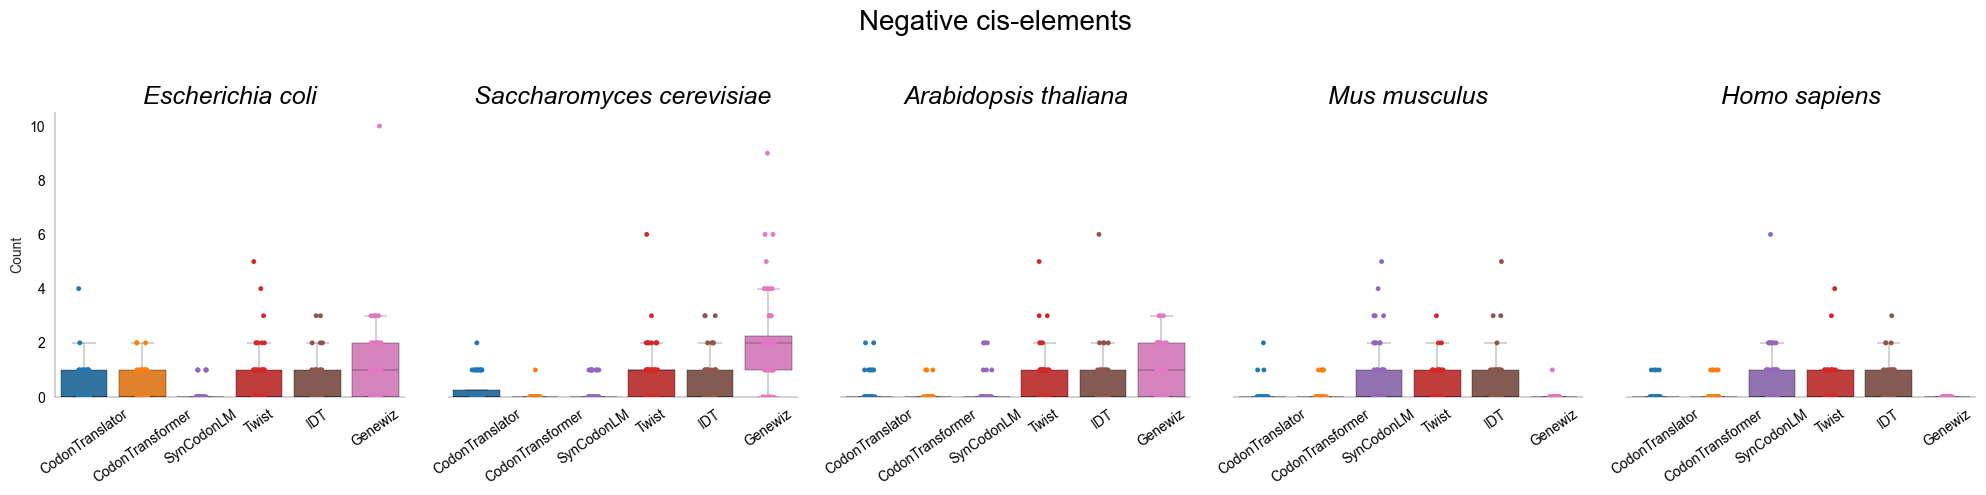

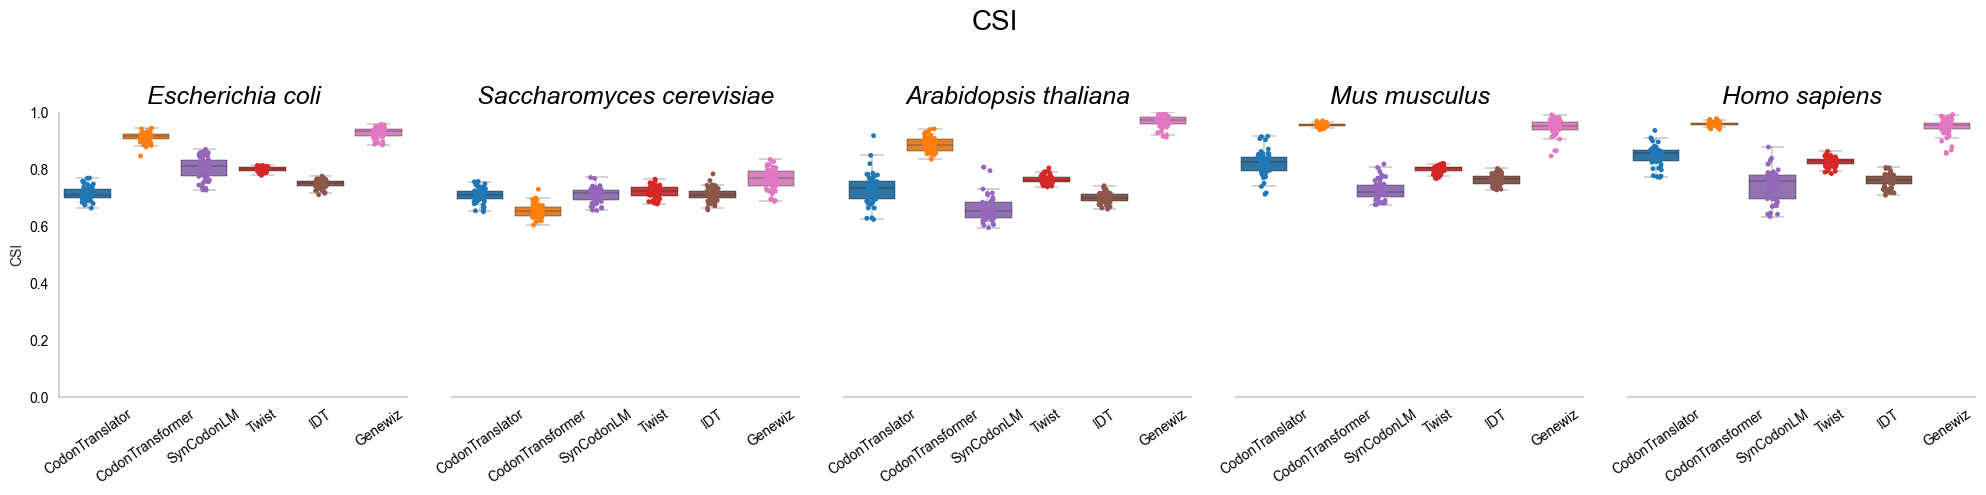

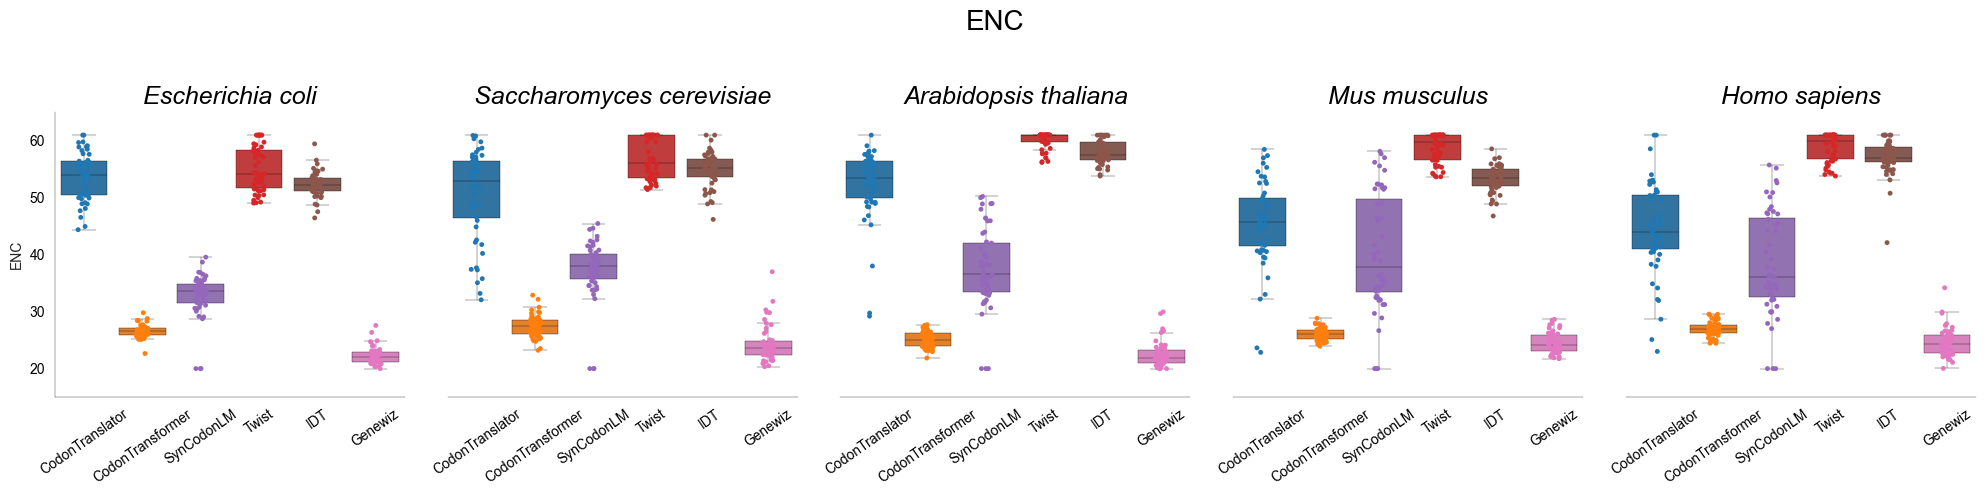

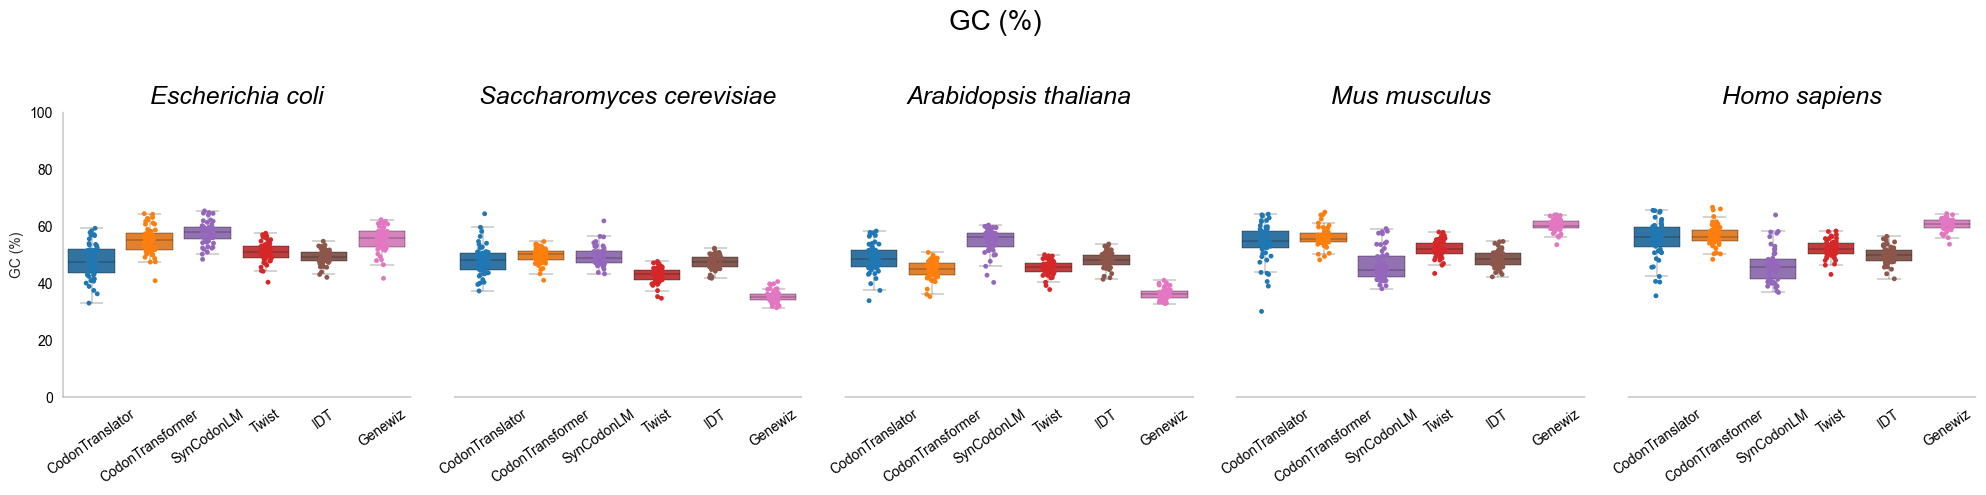

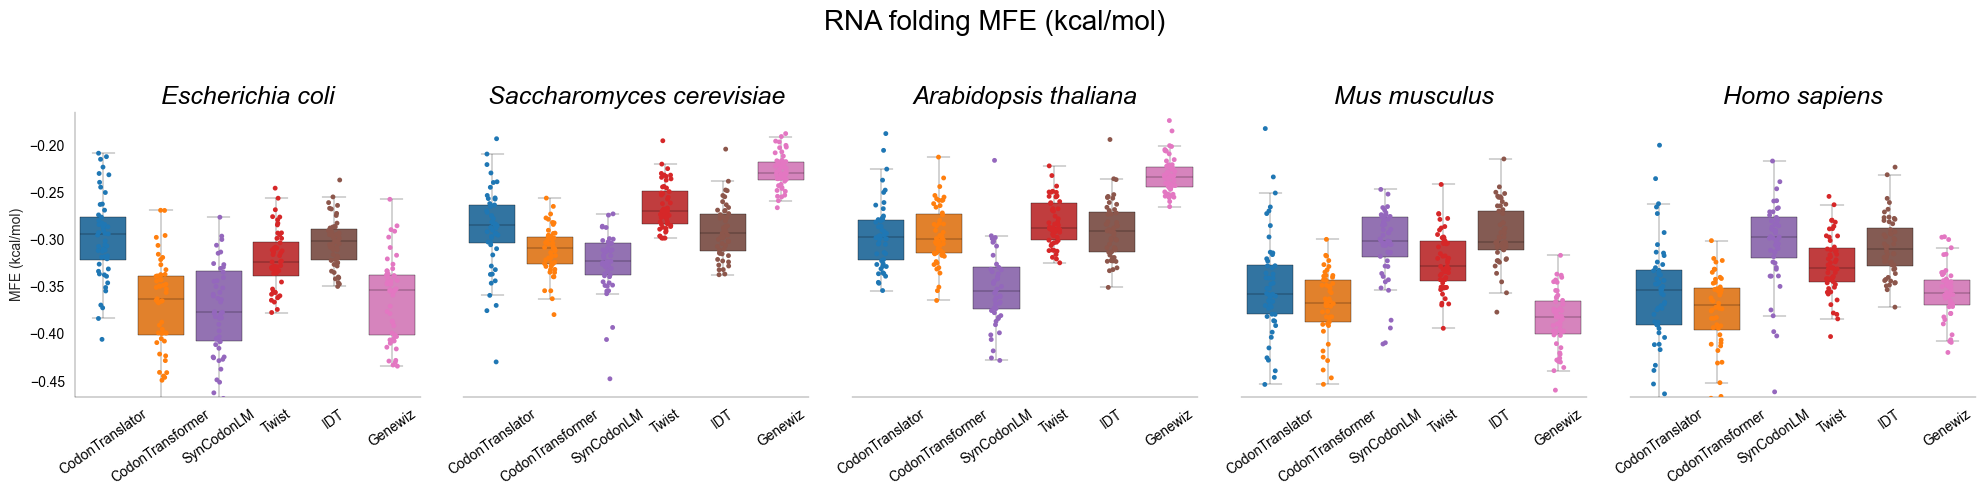

In [30]:
# ---- Usage ----
plot_all_he_panels(he_data)
# Or call individual ones:
# plot_metric_row(he_data, metric="GC", percent=True, title="GC (%)", ylab="GC (%)", out_eps="he_gc_pct.eps", y_min=0, y_max=100)
